#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
# Reading data
dados = pd.read_csv('./train.csv')

# Use at the end to compare
y_comparar_fim = dados[['Survived']]

#### Brief data analysis 

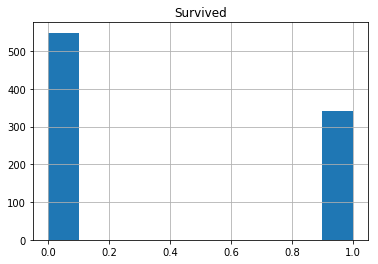

In [3]:
# Survivors
dados.hist('Survived');

In [4]:
dados.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
# Convert Sex Column to number 
# Male = 0
# Female = 1

def sex(x):
    if x.lower() == 'female':
        return 1
    elif x.lower() == 'male':
        return 0

# Apply
dados['Sex'] = dados['Sex'].apply(sex)

In [6]:
# Check
dados.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q


Remove:
- Passengerid
- Name
- Ticket
- Cabin

In [7]:
RETIRAR = ['PassengerId','Name','Ticket','Cabin']

dados.drop(RETIRAR,axis=1,inplace = True)

In [8]:
# Check
dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [9]:
#convert string to number
dados = pd.get_dummies(dados)

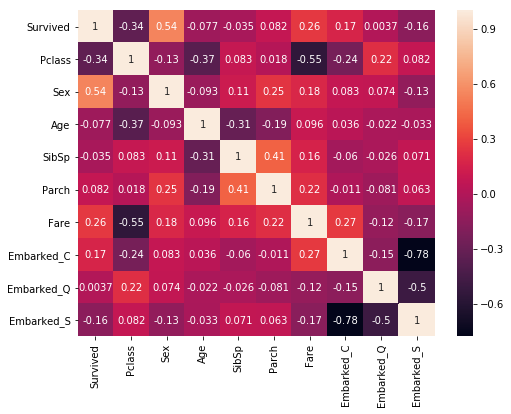

In [10]:
# Correlation graph between columns
plt.figure(figsize=(8,6))
sns.heatmap(dados.corr(),annot = True);

In [11]:
#Columns will be used
UTILIZADOS = ['Survived','Pclass','Sex','Age','Fare']

dados = dados[UTILIZADOS]

In [12]:
# Check
dados.head(4)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000


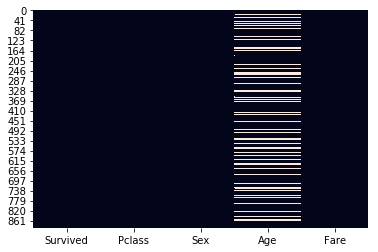

In [13]:
# Search for null values
sns.heatmap(dados.isnull(),cbar = False);


Age has many null values, to replace them, we will build a function that will have conditions depending on Pclass 1,2 and 3. The class was chosen, because according to the correlation graph, it has a higher correlation with age.

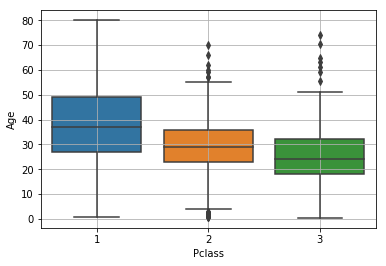

In [14]:
sns.boxplot(x='Pclass', y='Age', data = dados)
plt.grid()

In [15]:
def age(x):
    age = x[0]
    pclass = x[1]
    
    if np.isnan(age) == True:
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

dados['Age'] = dados[['Age','Pclass']].apply(age,axis=1)

In [16]:
# Check
dados.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


#### Organizing values

In [17]:
X = dados.drop('Survived',axis=1)
y = dados[['Survived']]

In [18]:
X.shape,y.shape

((891, 4), (891, 1))

#### Normalizing X data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

#### Separate Training and Validation data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = 0.1,
    random_state = 0,
    shuffle = True,
)

In [22]:
X_train.shape,y_train.shape

((801, 4), (801, 1))

#### Create function for Model, compile and train

In [23]:
# Model - n is a multiple used to change neural network
def creat_model(n):
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(
      units = n*2,
      activation = 'relu',
      input_shape = (X_train.shape[1],)
    ))
    

    model.add(tf.keras.layers.Dropout(0.1))
    
    model.add(tf.keras.layers.Dense(
      units = n*3,
      activation = 'relu',

    ))
    
    model.add(tf.keras.layers.Dropout(0.1))
    
    model.add(tf.keras.layers.Dense(
      units = 1,
      activation = 'sigmoid',
    ))
    
    # Compile
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    
    return model

# Train
def treinar(model, epochs):

    history = model.fit(
      X_train,
      y_train,
      validation_split=0.1,
      epochs = epochs,
      shuffle = True,
      )
    return history



#### Predictions

In [24]:
#This function separates the values of predictions
#into 0 and 1
def cond(x):
    if x >= 0.5:
      return 1
    else:
      return 0

def predict(X,y,model):

    pred_train = model.predict(X)
    pred_df = pd.DataFrame()
    pred_df['pred'] = pred_train[:,0]
    pred_df['pred'] = pred_df['pred'].apply(cond)
    y = y.reset_index().drop('index',axis=1)
    y_train_pred = y.join(pred_df)
    k = 0
    total = len(y_train_pred['pred'])
    for x,y in zip(y_train_pred['pred'],y_train_pred['Survived']):
      if x == y:
          k = k+1
    p = k/total
    p_ = np.around(p*100,2)
    print(f"Accuracy porcentage {p_}%")
    return p_


##### Function to Plot

In [25]:
def plot(history):

  plt.figure()
  plt.plot(history.history['accuracy'],'or', label = 'acc',alpha = 0.3)
  plt.plot(history.history['val_accuracy'], 'ob', label = 'acc_val',alpha = 0.3)
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(history.history['loss'],'or', label = 'loss',alpha = 0.3)
  plt.plot(history.history['val_loss'],'ob', label = 'loss_val',alpha = 0.3)
  plt.legend()
  plt.grid()

#### Calculation Routine:

In [39]:
v ={}
# n (number of neurons defined in the function above).
for n in range(200,301,20):
    # Can varied the epochs
    for epochs in range (40,41,1):
        
        #Apply Model and Training functions
        model = creat_model(n)
        history= treinar(model,epochs)
        
        #v [0] = Percentage of correct training data
        #v [1] = Percentage of correct validation data
        #v [2] = History (used to make the plot)
        #v [3] = Model (used to choose which trained model I will apply)
        v[str(n)+'_'+str(epochs)] = [predict(X_train,y_train,model),predict(X_val,y_val,model),history,model]

Train on 720 samples, validate on 81 samples
Epoch 1/40
720/720 [==============================] - 1s 879us/sample - loss: 0.5248 - accuracy: 0.7667 - val_loss: 0.5323 - val_accuracy: 0.6667
Epoch 2/40
720/720 [==============================] - 0s 202us/sample - loss: 0.4521 - accuracy: 0.7875 - val_loss: 0.5128 - val_accuracy: 0.6790
Epoch 3/40
720/720 [==============================] - 0s 221us/sample - loss: 0.4411 - accuracy: 0.8167 - val_loss: 0.4979 - val_accuracy: 0.7901
Epoch 4/40
720/720 [==============================] - 0s 221us/sample - loss: 0.4369 - accuracy: 0.8097 - val_loss: 0.5101 - val_accuracy: 0.6914
Epoch 5/40
720/720 [==============================] - 0s 204us/sample - loss: 0.4357 - accuracy: 0.8042 - val_loss: 0.5294 - val_accuracy: 0.6790
Epoch 6/40
720/720 [==============================] - 0s 233us/sample - loss: 0.4350 - accuracy: 0.8014 - val_loss: 0.4886 - val_accuracy: 0.7901
Epoch 7/40
720/720 [==============================] - 0s 218us/sample - loss: 0

Epoch 16/40
720/720 [==============================] - 0s 215us/sample - loss: 0.4291 - accuracy: 0.8014 - val_loss: 0.5063 - val_accuracy: 0.7284
Epoch 17/40
720/720 [==============================] - 0s 197us/sample - loss: 0.4250 - accuracy: 0.8056 - val_loss: 0.4944 - val_accuracy: 0.7901
Epoch 18/40
720/720 [==============================] - 0s 190us/sample - loss: 0.4299 - accuracy: 0.8014 - val_loss: 0.5031 - val_accuracy: 0.7407
Epoch 19/40
720/720 [==============================] - 0s 195us/sample - loss: 0.4228 - accuracy: 0.8125 - val_loss: 0.5066 - val_accuracy: 0.7284
Epoch 20/40
720/720 [==============================] - 0s 203us/sample - loss: 0.4201 - accuracy: 0.8153 - val_loss: 0.5318 - val_accuracy: 0.7037
Epoch 21/40
720/720 [==============================] - 0s 208us/sample - loss: 0.4331 - accuracy: 0.8042 - val_loss: 0.5251 - val_accuracy: 0.7037
Epoch 22/40
720/720 [==============================] - 0s 213us/sample - loss: 0.4239 - accuracy: 0.8125 - val_loss: 0

720/720 [==============================] - 0s 223us/sample - loss: 0.4255 - accuracy: 0.8097 - val_loss: 0.4982 - val_accuracy: 0.7901
Epoch 32/40
720/720 [==============================] - 0s 229us/sample - loss: 0.4187 - accuracy: 0.8181 - val_loss: 0.5567 - val_accuracy: 0.7160
Epoch 33/40
720/720 [==============================] - 0s 227us/sample - loss: 0.4162 - accuracy: 0.8111 - val_loss: 0.5234 - val_accuracy: 0.7037
Epoch 34/40
720/720 [==============================] - 0s 225us/sample - loss: 0.4105 - accuracy: 0.8194 - val_loss: 0.4852 - val_accuracy: 0.8148
Epoch 35/40
720/720 [==============================] - 0s 228us/sample - loss: 0.4117 - accuracy: 0.8111 - val_loss: 0.5062 - val_accuracy: 0.7407
Epoch 36/40
720/720 [==============================] - 0s 230us/sample - loss: 0.4100 - accuracy: 0.8222 - val_loss: 0.4946 - val_accuracy: 0.7407
Epoch 37/40
720/720 [==============================] - 0s 227us/sample - loss: 0.4151 - accuracy: 0.8181 - val_loss: 0.4831 - val_

720/720 [==============================] - 0s 307us/sample - loss: 0.4304 - accuracy: 0.8042 - val_loss: 0.5068 - val_accuracy: 0.7037
Epoch 6/40
720/720 [==============================] - 0s 298us/sample - loss: 0.4354 - accuracy: 0.8083 - val_loss: 0.4922 - val_accuracy: 0.7901
Epoch 7/40
720/720 [==============================] - 0s 302us/sample - loss: 0.4300 - accuracy: 0.8042 - val_loss: 0.5388 - val_accuracy: 0.6914
Epoch 8/40
720/720 [==============================] - 0s 283us/sample - loss: 0.4307 - accuracy: 0.8028 - val_loss: 0.4918 - val_accuracy: 0.7778
Epoch 9/40
720/720 [==============================] - 0s 296us/sample - loss: 0.4297 - accuracy: 0.8167 - val_loss: 0.5118 - val_accuracy: 0.7037
Epoch 10/40
720/720 [==============================] - 0s 295us/sample - loss: 0.4389 - accuracy: 0.8083 - val_loss: 0.4915 - val_accuracy: 0.7901
Epoch 11/40
720/720 [==============================] - 0s 297us/sample - loss: 0.4315 - accuracy: 0.8028 - val_loss: 0.5147 - val_accu

720/720 [==============================] - 0s 322us/sample - loss: 0.4222 - accuracy: 0.8167 - val_loss: 0.4882 - val_accuracy: 0.8148
Epoch 21/40
720/720 [==============================] - 0s 319us/sample - loss: 0.4301 - accuracy: 0.8042 - val_loss: 0.4814 - val_accuracy: 0.8148
Epoch 22/40
720/720 [==============================] - 0s 316us/sample - loss: 0.4178 - accuracy: 0.8181 - val_loss: 0.4990 - val_accuracy: 0.7901
Epoch 23/40
720/720 [==============================] - 0s 317us/sample - loss: 0.4207 - accuracy: 0.8153 - val_loss: 0.5179 - val_accuracy: 0.7160
Epoch 24/40
720/720 [==============================] - 0s 317us/sample - loss: 0.4165 - accuracy: 0.8167 - val_loss: 0.4751 - val_accuracy: 0.8148
Epoch 25/40
720/720 [==============================] - 0s 318us/sample - loss: 0.4242 - accuracy: 0.8181 - val_loss: 0.5305 - val_accuracy: 0.7160
Epoch 26/40
720/720 [==============================] - 0s 315us/sample - loss: 0.4169 - accuracy: 0.8139 - val_loss: 0.4805 - val_

In [40]:
for k in v.keys():
    print(k)
    predict(X,y_comparar_fim,v[k][3])
    
# neuron_epochs

200_40
Accuracy porcentage 81.71%
220_40
Accuracy porcentage 81.48%
240_40
Accuracy porcentage 81.03%
260_40
Accuracy porcentage 80.81%
280_40
Accuracy porcentage 80.81%
300_40
Accuracy porcentage 82.49%


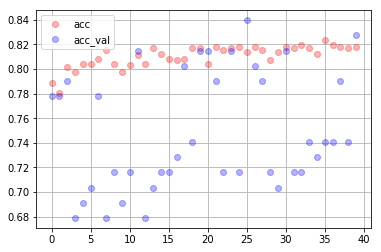

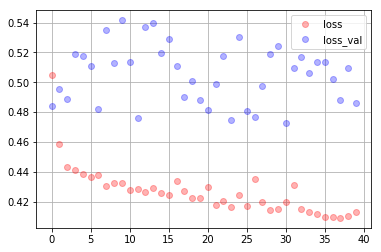

In [41]:
# Example of accuracy and loss data depending on the epochs
plot(v['300_40'][2])

### Test Data Predictions

Import the test data

In [42]:
dados_test = pd.read_csv('./test.csv')

dados_x_test = dados_test[UTILIZADOS[1:]]# take out survived 

In [43]:
# Check
dados_x_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


Turn sex column in number

In [44]:
dados_x_test['Sex'] = dados_x_test['Sex'].apply(sex)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Check for Null values

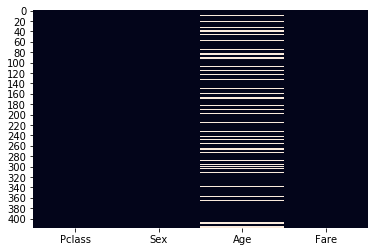

In [45]:
sns.heatmap(dados_x_test.isnull(),cbar=False);

Again, using classes, we will try to predict people's ages through the median using the boxplot

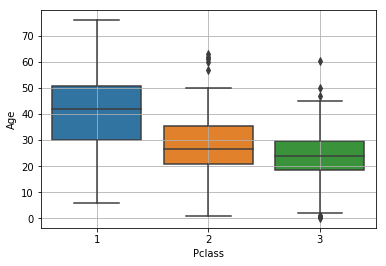

In [46]:
sns.boxplot(x='Pclass', y='Age', data = dados_x_test);
plt.grid()

As the data has changed, you must again create a function to replace the nulls

In [47]:
def age_new(x):
    age = x[0]
    pclass = x[1]
    
    if np.isnan(age) == True:
        
        if pclass == 1:
            return 42
        elif pclass == 2:
            return 27
        elif pclass == 3:
            return 24
    else:
        return age
    
dados_x_test['Age'] = dados_x_test[['Age','Pclass']].apply(age_new,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Normalize

In [48]:
dados_x_test = scaler.fit_transform(dados_x_test)

Selecting the best model predicted

In [49]:
prev_env = v['300_40'][3].predict(dados_x_test)

Adding predictions to a DataFrame

In [50]:
dados_env = pd.DataFrame()
dados_env['PassengerId'] = dados_test['PassengerId']
dados_env['Survived'] = prev_env[:,0]

Apply condition 0 and 1

In [51]:
dados_env['Survived'] = dados_env['Survived'].apply(cond)

In [52]:
#Salve data
dados_env.to_csv('./Titanic_Predictions.csv',index=False)